# Introduction

Let's use Daft to explore [COCO](https://cocodataset.org/#home)---a large-scale object detection, segmentation, and captioning dataset.
<div>
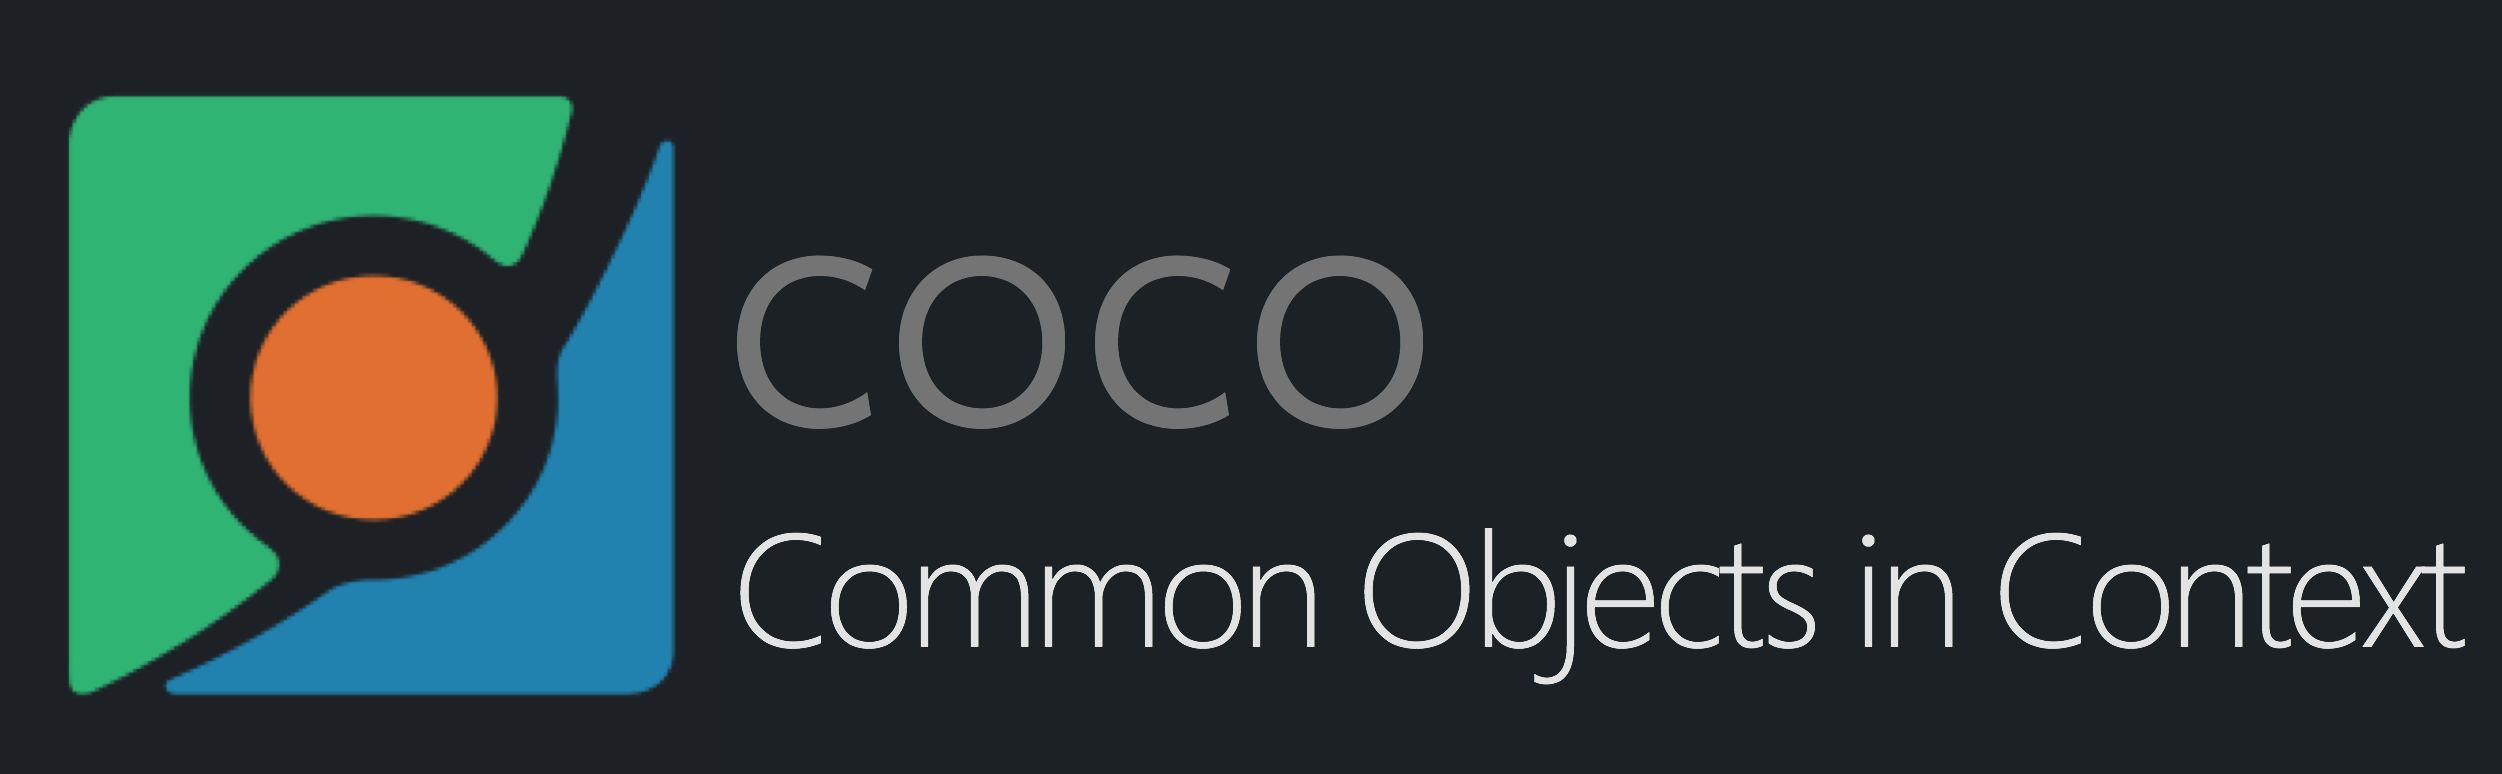
</div>

<div>
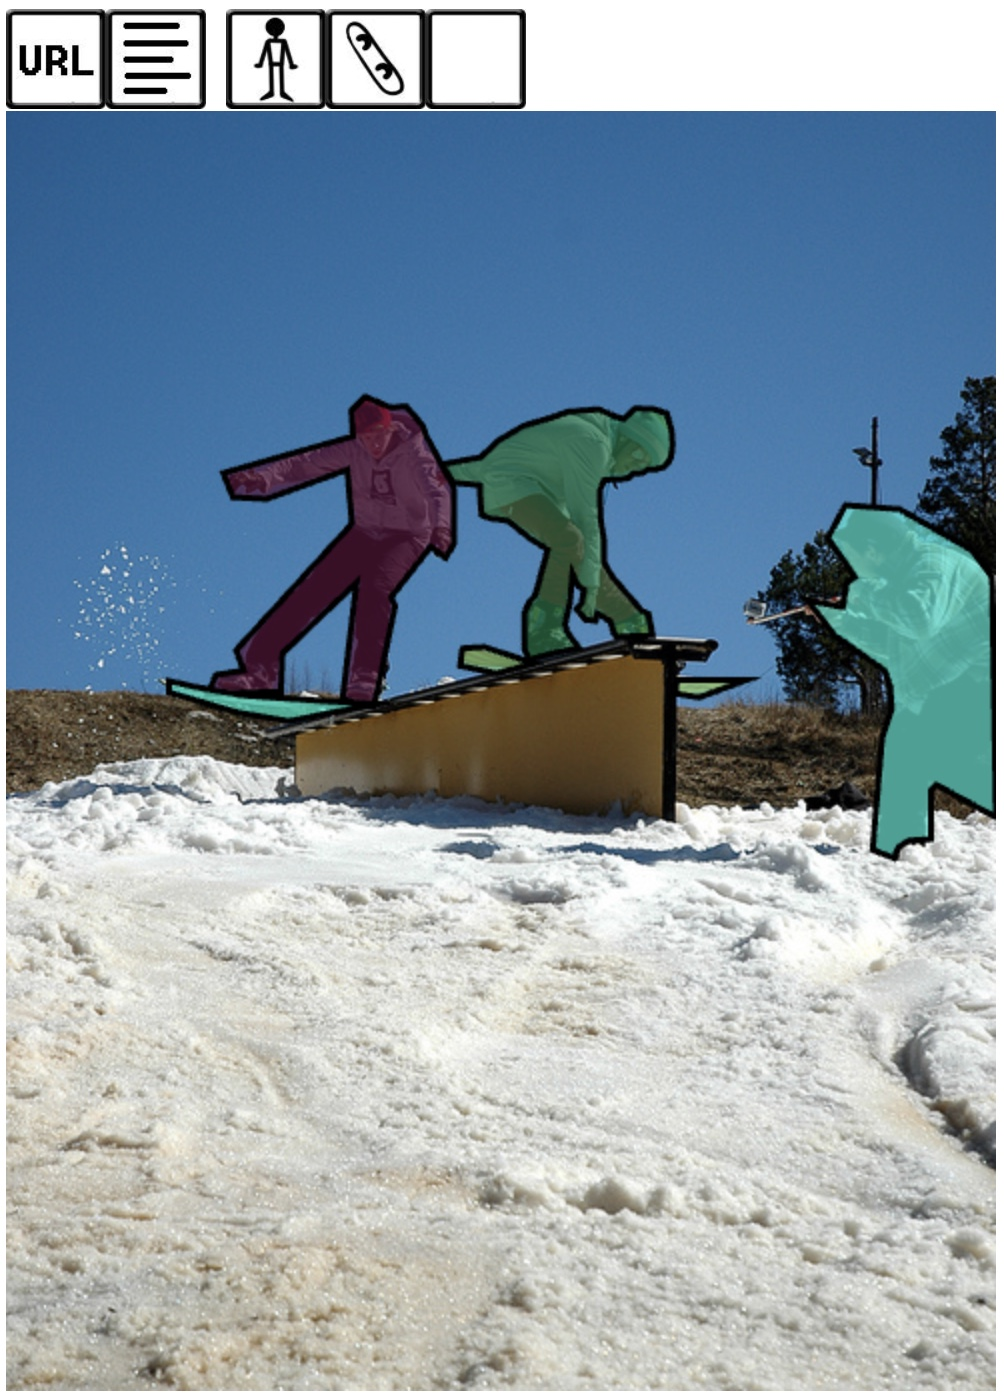
</div>

Daft is designed to be simple to use. Just pip install, and you can call `.read_parquet` on an S3 url.

In [ ]:
!pip install daft

In [2]:
import os
import daft
df = daft.read_parquet("s3://daft-public-data/coco-2017-parquet/image_buckets.parquet")
df

licenseInt64,file_nameUtf8,coco_urlUtf8,heightInt64,widthInt64,date_capturedUtf8,flickr_urlUtf8,idInt64,bucket_urlUtf8


Dataframes are lazy, so the cell above simply reads the metadata of the parquet file. We can preview the data in the cell by doing a `.show()`.

In [3]:
df.show(5)

licenseInt64,file_nameUtf8,coco_urlUtf8,heightInt64,widthInt64,date_capturedUtf8,flickr_urlUtf8,idInt64,bucket_urlUtf8
4,000000397133.jpg,http://images.cocodataset.org/val2017/000000397133.jpg,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg,397133,s3://daft-public-data/coco-2017-parquet/images/000000397133.jpg
1,000000037777.jpg,http://images.cocodataset.org/val2017/000000037777.jpg,230,352,2013-11-14 20:55:31,http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg,37777,s3://daft-public-data/coco-2017-parquet/images/000000037777.jpg
4,000000252219.jpg,http://images.cocodataset.org/val2017/000000252219.jpg,428,640,2013-11-14 22:32:02,http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg,252219,s3://daft-public-data/coco-2017-parquet/images/000000252219.jpg
1,000000087038.jpg,http://images.cocodataset.org/val2017/000000087038.jpg,480,640,2013-11-14 23:11:37,http://farm8.staticflickr.com/7355/8825114508_b0fa4d7168_z.jpg,87038,s3://daft-public-data/coco-2017-parquet/images/000000087038.jpg
6,000000174482.jpg,http://images.cocodataset.org/val2017/000000174482.jpg,388,640,2013-11-14 23:16:55,http://farm8.staticflickr.com/7020/6478877255_242f741dd1_z.jpg,174482,s3://daft-public-data/coco-2017-parquet/images/000000174482.jpg


Daft provides convenient methods for working with multimodal data. For example, we can do a url download and image decode to get the image stored in the `bucket_url` column.

`.url.download()` and `.image.decode()` are more than just convenient functions. They're implemented natively in Rust and designed so that the parquet read from S3, url download from S3, and image decoding, are all pipelined and happening in parallel! Later we'll see an example where both network i/o and compute resources are completely saturated for maximum performance.

In [4]:
df.with_column(
    "image",
    df["bucket_url"].url.download().image.decode()
).show(5)

╭─────────┬──────────────────┬──────────────────────────┬────────────┬────────┬─────────────────────────┬──────────────╮
│ license ┆ file_name        ┆ coco_url                 ┆      …     ┆ id     ┆ bucket_url              ┆ image        │
│ ---     ┆ ---              ┆ ---                      ┆            ┆ ---    ┆ ---                     ┆ ---          │
│ Int64   ┆ Utf8             ┆ Utf8                     ┆ (4 hidden) ┆ Int64  ┆ Utf8                    ┆ Image[MIXED] │
╞═════════╪══════════════════╪══════════════════════════╪════════════╪════════╪═════════════════════════╪══════════════╡
│ 4       ┆ 000000397133.jpg ┆ http://images.cocodatase ┆ …          ┆ 397133 ┆ s3://daft-public-data/c ┆ <Image>      │
│         ┆                  ┆ t.org…                   ┆            ┆        ┆ oco-20…                 ┆              │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 1       ┆ 000000037777.jpg ┆ http://images.cocodatase ┆ …          ┆ 37777  ┆ s3://daft-public-data/c ┆ <Image>      │
│         ┆                  ┆ t.org…                   ┆            ┆        ┆ oco-20…                 ┆              │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 4       ┆ 000000252219.jpg ┆ http://images.cocodatase ┆ …          ┆ 252219 ┆ s3://daft-public-data/c ┆ <Image>      │
│         ┆                  ┆ t.org…                   ┆            ┆        ┆ oco-20…                 ┆              │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 1       ┆ 000000087038.jpg ┆ http://images.cocodatase ┆ …          ┆ 87038  ┆ s3://daft-public-data/c ┆ <Image>      │
│         ┆                  ┆ t.org…                   ┆            ┆        ┆ oco-20…                 ┆              │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 6       ┆ 000000174482.jpg ┆ http://images.cocodatase ┆ …          ┆ 174482 ┆ s3://daft-public-data/c ┆ <Image>      │
│         ┆                  ┆ t.org…                   ┆            ┆        ┆ oco-20…                 ┆              │
╰─────────┴──────────────────┴──────────────────────────┴────────────┴────────┴─────────────────────────┴──────────────╯

(Showing first 5 rows)

# Data Catalogs

A production-ready data engine needs to work seamlessly with data catalogs. Let's see an example of working easily with Unity Catalog.

In [5]:
from daft.unity_catalog import UnityCatalog

unity = UnityCatalog(
    endpoint=os.environ["EVENTUAL_DATABRICKS_ENDPOINT"],
    token=os.environ["DATABRICKS_API_KEY"]
)

print(unity.list_tables("jaytest-unity.default"))

['jaytest-unity.default.coco_annotations', 'jaytest-unity.default.coco_categories', 'jaytest-unity.default.coco_cropped', 'jaytest-unity.default.coco_images', 'jaytest-unity.default.nation']


In [6]:
from daft import Session

# create a new empty session
sess = Session()

# create a daft catalog from the unity catalog
catalog = daft.Catalog.from_unity(unity)

# attach the catalog to the session
sess.attach(catalog)

In [7]:
catalog.list_tables("jaytest-unity.default")

['jaytest-unity.default.coco_annotations',
 'jaytest-unity.default.coco_categories',
 'jaytest-unity.default.coco_cropped',
 'jaytest-unity.default.coco_images',
 'jaytest-unity.default.nation']

Previewing the contents of a table from Unity Catalog takes only seconds!

In [8]:
%%time
sess.get_table("jaytest-unity.default.coco_images").show(5)

licenseInt64,file_nameUtf8,coco_urlUtf8,heightInt64,widthInt64,date_capturedUtf8,flickr_urlUtf8,idInt64,bucket_urlUtf8
4,000000397133.jpg,http://images.cocodataset.org/val2017/000000397133.jpg,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg,397133,s3://daft-public-data/coco-2017-parquet/images/000000397133.jpg
1,000000037777.jpg,http://images.cocodataset.org/val2017/000000037777.jpg,230,352,2013-11-14 20:55:31,http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg,37777,s3://daft-public-data/coco-2017-parquet/images/000000037777.jpg
4,000000252219.jpg,http://images.cocodataset.org/val2017/000000252219.jpg,428,640,2013-11-14 22:32:02,http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg,252219,s3://daft-public-data/coco-2017-parquet/images/000000252219.jpg
1,000000087038.jpg,http://images.cocodataset.org/val2017/000000087038.jpg,480,640,2013-11-14 23:11:37,http://farm8.staticflickr.com/7355/8825114508_b0fa4d7168_z.jpg,87038,s3://daft-public-data/coco-2017-parquet/images/000000087038.jpg
6,000000174482.jpg,http://images.cocodataset.org/val2017/000000174482.jpg,388,640,2013-11-14 23:16:55,http://farm8.staticflickr.com/7020/6478877255_242f741dd1_z.jpg,174482,s3://daft-public-data/coco-2017-parquet/images/000000174482.jpg


CPU times: user 937 ms, sys: 2.58 s, total: 3.52 s
Wall time: 2.14 s


# SQL

Some queries are easier to express in SQL, and sometimes SQL is simply someone's preferred language for working with data. Daft provides a fully functional SQL engine for the most common SQL operators.

In [9]:
%%time

# select all columns
sess.sql("""
SELECT
    *
FROM
    "jaytest-unity.default.coco_images" as images
""").show(5)

licenseInt64,file_nameUtf8,coco_urlUtf8,heightInt64,widthInt64,date_capturedUtf8,flickr_urlUtf8,idInt64,bucket_urlUtf8
4,000000397133.jpg,http://images.cocodataset.org/val2017/000000397133.jpg,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg,397133,s3://daft-public-data/coco-2017-parquet/images/000000397133.jpg
1,000000037777.jpg,http://images.cocodataset.org/val2017/000000037777.jpg,230,352,2013-11-14 20:55:31,http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg,37777,s3://daft-public-data/coco-2017-parquet/images/000000037777.jpg
4,000000252219.jpg,http://images.cocodataset.org/val2017/000000252219.jpg,428,640,2013-11-14 22:32:02,http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg,252219,s3://daft-public-data/coco-2017-parquet/images/000000252219.jpg
1,000000087038.jpg,http://images.cocodataset.org/val2017/000000087038.jpg,480,640,2013-11-14 23:11:37,http://farm8.staticflickr.com/7355/8825114508_b0fa4d7168_z.jpg,87038,s3://daft-public-data/coco-2017-parquet/images/000000087038.jpg
6,000000174482.jpg,http://images.cocodataset.org/val2017/000000174482.jpg,388,640,2013-11-14 23:16:55,http://farm8.staticflickr.com/7020/6478877255_242f741dd1_z.jpg,174482,s3://daft-public-data/coco-2017-parquet/images/000000174482.jpg


CPU times: user 86.4 ms, sys: 28 ms, total: 114 ms
Wall time: 1.34 s


In [10]:
# select specific columns
sess.sql("""
SELECT
    id, bucket_url, height, width
FROM
    "jaytest-unity.default.coco_images" as images
""").show(5)

idInt64,bucket_urlUtf8,heightInt64,widthInt64
397133,s3://daft-public-data/coco-2017-parquet/images/000000397133.jpg,427,640
37777,s3://daft-public-data/coco-2017-parquet/images/000000037777.jpg,230,352
252219,s3://daft-public-data/coco-2017-parquet/images/000000252219.jpg,428,640
87038,s3://daft-public-data/coco-2017-parquet/images/000000087038.jpg,480,640
174482,s3://daft-public-data/coco-2017-parquet/images/000000174482.jpg,388,640


In [11]:
# filter
sess.sql("""
SELECT
    id, bucket_url, height, width
FROM
    "jaytest-unity.default.coco_images" as images
WHERE
    width < 500
""").show(5)

idInt64,bucket_urlUtf8,heightInt64,widthInt64
37777,s3://daft-public-data/coco-2017-parquet/images/000000037777.jpg,230,352
6818,s3://daft-public-data/coco-2017-parquet/images/000000006818.jpg,640,427
480985,s3://daft-public-data/coco-2017-parquet/images/000000480985.jpg,500,375
331352,s3://daft-public-data/coco-2017-parquet/images/000000331352.jpg,500,351
491497,s3://daft-public-data/coco-2017-parquet/images/000000491497.jpg,500,375


In [12]:
# count
sess.sql("""
SELECT
    count(*)
FROM 
    "jaytest-unity.default.coco_images" as images
WHERE
    width < 500
""").show(5)

countUInt64
1179


In [13]:
# sort and mix SQL with dataframes
sess.sql("""
SELECT 
    id, bucket_url, height, width
FROM 
    "jaytest-unity.default.coco_images" as images
WHERE 
    width < 500
""").sort("width", desc=True).show(5)

idInt64,bucket_urlUtf8,heightInt64,widthInt64
407825,s3://daft-public-data/coco-2017-parquet/images/000000407825.jpg,500,499
28809,s3://daft-public-data/coco-2017-parquet/images/000000028809.jpg,500,498
236845,s3://daft-public-data/coco-2017-parquet/images/000000236845.jpg,640,495
554579,s3://daft-public-data/coco-2017-parquet/images/000000554579.jpg,640,494
464522,s3://daft-public-data/coco-2017-parquet/images/000000464522.jpg,640,494


# JOINs

In [14]:
sess.sql("""
SELECT 
    id, bbox, supercategory
FROM 
    "jaytest-unity.default.coco_images" as images
JOIN 
    "jaytest-unity.default.coco_annotations" as annotations
    ON images.id = annotations.image_id
JOIN 
    "jaytest-unity.default.coco_categories" as categories
    ON annotations.category_id = categories.id
""").show(5)

idInt64,bboxList[Float64],supercategoryUtf8
289343,"[473.07, 395.93, 38.65, 28.67]",animal
61471,"[272.1, 200.23, 151.97, 279.77]",animal
472375,"[124.71, 196.18, 372.85, 356.81]",animal
520301,"[112.71, 154.82, 367.29, 479.35]",animal
579321,"[200.61, 89.65, 400.22, 251.02]",animal


In [15]:
# we support all kinds of joins (inner, outer, left, right, anti, and semi)
sess.sql("""
SELECT 
    id, bbox, supercategory
FROM 
    "jaytest-unity.default.coco_images" as images
LEFT JOIN 
    "jaytest-unity.default.coco_annotations" as annotations
    ON images.id = annotations.image_id
LEFT JOIN 
    "jaytest-unity.default.coco_categories" as categories
    ON annotations.category_id = categories.id
""").show(5)

idInt64,bboxList[Float64],supercategoryUtf8
289343,"[473.07, 395.93, 38.65, 28.67]",animal
61471,"[272.1, 200.23, 151.97, 279.77]",animal
472375,"[124.71, 196.18, 372.85, 356.81]",animal
520301,"[112.71, 154.82, 367.29, 479.35]",animal
579321,"[200.61, 89.65, 400.22, 251.02]",animal


In [16]:
# let's filter by category
df = sess.sql("""
SELECT 
    id, annotations.id as annotation_id, bbox, supercategory
FROM 
    "jaytest-unity.default.coco_images" as images
JOIN 
    "jaytest-unity.default.coco_annotations" as annotations
    ON images.id = annotations.image_id
JOIN 
    "jaytest-unity.default.coco_categories" as categories
    ON annotations.category_id = categories.id
WHERE
    supercategory = 'person'
""")
df.show()

idInt64,annotation_idInt64,bboxList[Float64],supercategoryUtf8
425226,183126,"[73.35, 206.02, 300.58, 372.5]",person
440475,183302,"[491.91, 183.51, 34.85, 73.4]",person
266400,183830,"[36.32, 0.59, 38.56, 53.86]",person
69213,184249,"[276.35, 9.6, 244.69, 400.13]",person
555050,184327,"[97.1, 185.73, 28.66, 27.72]",person
292456,184382,"[184.55, 45.56, 128.09, 255.34]",person
309391,184647,"[79.58, 252.92, 24.11, 72.03]",person
291634,184742,"[349.51, 189.48, 35.68, 93.9]",person


We can even perform the url download and image decode functions we did earlier in SQL.

In [17]:
# perform a url download and image decode in SQL
df = sess.sql("""
SELECT 
    id, annotations.id as annotation_id, bbox, supercategory, image_decode(url_download(bucket_url)) as image
FROM 
    "jaytest-unity.default.coco_images" as images
JOIN 
    "jaytest-unity.default.coco_annotations" as annotations
    ON images.id = annotations.image_id
JOIN 
    "jaytest-unity.default.coco_categories" as categories
    ON annotations.category_id = categories.id
WHERE
    supercategory = 'person'
""")
df.show()

╭────────┬───────────────┬────────────────────────────────┬───────────────┬──────────────╮
│ id     ┆ annotation_id ┆ bbox                           ┆ supercategory ┆ image        │
│ ---    ┆ ---           ┆ ---                            ┆ ---           ┆ ---          │
│ Int64  ┆ Int64         ┆ List[Float64]                  ┆ Utf8          ┆ Image[MIXED] │
╞════════╪═══════════════╪════════════════════════════════╪═══════════════╪══════════════╡
│ 425226 ┆ 183126        ┆ [73.35, 206.02, 300.58, 372.5… ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 440475 ┆ 183302        ┆ [491.91, 183.51, 34.85, 73.4]  ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 266400 ┆ 183830        ┆ [36.32, 0.59, 38.56, 53.86]    ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 69213  ┆ 184249        ┆ [276.35, 9.6, 244.69, 400.13]  ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 555050 ┆ 184327        ┆ [97.1, 185.73, 28.66, 27.72]   ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 292456 ┆ 184382        ┆ [184.55, 45.56, 128.09, 255.3… ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 309391 ┆ 184647        ┆ [79.58, 252.92, 24.11, 72.03]  ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 291634 ┆ 184742        ┆ [349.51, 189.48, 35.68, 93.9]  ┆ person        ┆ <Image>      │
╰────────┴───────────────┴────────────────────────────────┴───────────────┴──────────────╯

(Showing first 8 rows)

In [18]:
# apply a limit to the result
df = sess.sql("""
SELECT 
    id, annotations.id as annotation_id, bbox, supercategory, image_decode(url_download(bucket_url)) as image
FROM 
    "jaytest-unity.default.coco_images" as images
JOIN 
    "jaytest-unity.default.coco_annotations" as annotations
    ON images.id = annotations.image_id
JOIN 
    "jaytest-unity.default.coco_categories" as categories
    ON annotations.category_id = categories.id
WHERE
    supercategory = 'person'
LIMIT 5
""")
df.show()

╭────────┬───────────────┬────────────────────────────────┬───────────────┬──────────────╮
│ id     ┆ annotation_id ┆ bbox                           ┆ supercategory ┆ image        │
│ ---    ┆ ---           ┆ ---                            ┆ ---           ┆ ---          │
│ Int64  ┆ Int64         ┆ List[Float64]                  ┆ Utf8          ┆ Image[MIXED] │
╞════════╪═══════════════╪════════════════════════════════╪═══════════════╪══════════════╡
│ 425226 ┆ 183126        ┆ [73.35, 206.02, 300.58, 372.5… ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 440475 ┆ 183302        ┆ [491.91, 183.51, 34.85, 73.4]  ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 266400 ┆ 183830        ┆ [36.32, 0.59, 38.56, 53.86]    ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 69213  ┆ 184249        ┆ [276.35, 9.6, 244.69, 400.13]  ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 555050 ┆ 184327        ┆ [97.1, 185.73, 28.66, 27.72]   ┆ person        ┆ <Image>      │
╰────────┴───────────────┴────────────────────────────────┴───────────────┴──────────────╯

(Showing first 5 of 5 rows)

# Optimizations

Daft also has a fully-fledged query optimizer. We can view the logical plan for any query by calling `.explain()` on a dataframe.

In [19]:
df.explain(format="mermaid")

```mermaid
flowchart TD
Limit0["Limit: 5"]
Project1["Project: col(id), col(annotations.id) as annotation_id, col(bbox),
col(supercategory), image_decode(download(col(bucket_url))) as image"]
Filter2["Filter: col(supercategory) == lit('person')"]
Join3["Join: Type = Inner
Strategy = Auto
Left on = col(category_id)
Right on = col(categories.id)
Null equals Nulls = [false]
Output schema = license#Int64, file_name#Utf8, coco_url#Utf8,
height#Int64, width#Int64, date_captured#Utf8, flickr_url#Utf8,
id#Int64, bucket_url#Utf8, area#Float64, iscrowd#Int64, image_id#Int64,
bbox#List(Float64), category_id#Int64, annotations.id#Int64,
segmentation_polygons#List(List(Float64)), segmentation_rle#Struct([Field
{ name: 'counts', dtype: List(Int64), metadata: {} }, Field { name: 'size',
dtype: List(Int64), metadata: {} }]), supercategory#Utf8, categories.id#Int64,
name#Utf8"]
Join4["Join: Type = Inner
Strategy = Auto
Left on = col(id)
Right on = col(image_id)
Null equals Nulls = [false]
Output schema = license#Int64, file_name#Utf8, coco_url#Utf8,
height#Int64, width#Int64, date_captured#Utf8, flickr_url#Utf8,
id#Int64, bucket_url#Utf8, area#Float64, iscrowd#Int64, image_id#Int64,
bbox#List(Float64), category_id#Int64, annotations.id#Int64,
segmentation_polygons#List(List(Float64)), segmentation_rle#Struct([Field
{ name: 'counts', dtype: List(Int64), metadata: {} }, Field { name: 'size',
dtype: List(Int64), metadata: {} }])"]
Alias5["Alias
name = images"]
Alias6["Alias
name = jaytest-unity.default.coco_images"]
Source7["PythonScanOperator: DeltaLakeScanOperator(None)
File schema = license#Int64, file_name#Utf8, coco_url#Utf8, height#Int64,
width#Int64, date_captured#Utf8, flickr_url#Utf8, id#Int64, bucket_url#Utf8
Partitioning keys = []
Output schema = license#Int64, file_name#Utf8, coco_url#Utf8, height#Int64,
width#Int64, date_captured#Utf8, flickr_url#Utf8, id#Int64, bucket_url#Utf8"]
Source7 --> Alias6
Alias6 --> Alias5
Alias5 --> Join4
Project8["Project: col(area), col(iscrowd), col(image_id), col(bbox), col(category_id),
col(id) as annotations.id, col(segmentation_polygons), col(segmentation_rle)"]
Alias9["Alias
name = annotations"]
Alias10["Alias
name = jaytest-unity.default.coco_annotations"]
Source11["PythonScanOperator: DeltaLakeScanOperator(None)
File schema = area#Float64, iscrowd#Int64, image_id#Int64, bbox#List(Float64),
category_id#Int64, id#Int64, segmentation_polygons#List(List(Float64)),
segmentation_rle#Struct([Field { name: 'counts', dtype: List(Int64), metadata:
{} }, Field { name: 'size', dtype: List(Int64), metadata: {} }])
Partitioning keys = []
Output schema = area#Float64, iscrowd#Int64, image_id#Int64, bbox#List(Float64),
category_id#Int64, id#Int64, segmentation_polygons#List(List(Float64)),
segmentation_rle#Struct([Field { name: 'counts', dtype: List(Int64), metadata:
{} }, Field { name: 'size', dtype: List(Int64), metadata: {} }])"]
Source11 --> Alias10
Alias10 --> Alias9
Alias9 --> Project8
Project8 --> Join4
Join4 --> Join3
Project12["Project: col(supercategory), col(id) as categories.id, col(name)"]
Alias13["Alias
name = categories"]
Alias14["Alias
name = jaytest-unity.default.coco_categories"]
Source15["PythonScanOperator: DeltaLakeScanOperator(None)
File schema = supercategory#Utf8, id#Int64, name#Utf8
Partitioning keys = []
Output schema = supercategory#Utf8, id#Int64, name#Utf8"]
Source15 --> Alias14
Alias14 --> Alias13
Alias13 --> Project12
Project12 --> Join3
Join3 --> Filter2
Filter2 --> Project1
Project1 --> Limit0

```
Set `show_all=True` to also see the Optimized and Physical plans. This will run the query optimizer.

Setting `show_all=True` allows us to view the optimization passes over the logical plan. In the example below, we see examples of predicate pushdown, partition pruning, limit pushdown (past expensive expressions like url downloading), and join reordering.

In [20]:
df.explain(show_all=True, format="mermaid")

```mermaid
flowchart TD
subgraph unoptimized["Unoptimized LogicalPlan"]
direction TB
unoptimizedLimit0["Limit: 5"]
unoptimizedProject1["Project: col(id), col(annotations.id) as annotation_id, col(bbox),
col(supercategory), image_decode(download(col(bucket_url))) as image"]
unoptimizedFilter2["Filter: col(supercategory) == lit('person')"]
unoptimizedJoin3["Join: Type = Inner
Strategy = Auto
Left on = col(category_id)
Right on = col(categories.id)
Null equals Nulls = [false]
Output schema = license#Int64, file_name#Utf8, coco_url#Utf8,
height#Int64, width#Int64, date_captured#Utf8, flickr_url#Utf8,
id#Int64, bucket_url#Utf8, area#Float64, iscrowd#Int64, image_id#Int64,
bbox#List(Float64), category_id#Int64, annotations.id#Int64,
segmentation_polygons#List(List(Float64)), segmentation_rle#Struct([Field
{ name: 'counts', dtype: List(Int64), metadata: {} }, Field { name: 'size',
dtype: List(Int64), metadata: {} }]), supercategory#Utf8, categories.id#Int64,
name#Utf8"]
unoptimizedJoin4["Join: Type = Inner
Strategy = Auto
Left on = col(id)
Right on = col(image_id)
Null equals Nulls = [false]
Output schema = license#Int64, file_name#Utf8, coco_url#Utf8,
height#Int64, width#Int64, date_captured#Utf8, flickr_url#Utf8,
id#Int64, bucket_url#Utf8, area#Float64, iscrowd#Int64, image_id#Int64,
bbox#List(Float64), category_id#Int64, annotations.id#Int64,
segmentation_polygons#List(List(Float64)), segmentation_rle#Struct([Field
{ name: 'counts', dtype: List(Int64), metadata: {} }, Field { name: 'size',
dtype: List(Int64), metadata: {} }])"]
unoptimizedAlias5["Alias
name = images"]
unoptimizedAlias6["Alias
name = jaytest-unity.default.coco_images"]
unoptimizedSource7["PythonScanOperator: DeltaLakeScanOperator(None)
File schema = license#Int64, file_name#Utf8, coco_url#Utf8, height#Int64,
width#Int64, date_captured#Utf8, flickr_url#Utf8, id#Int64, bucket_url#Utf8
Partitioning keys = []
Output schema = license#Int64, file_name#Utf8, coco_url#Utf8, height#Int64,
width#Int64, date_captured#Utf8, flickr_url#Utf8, id#Int64, bucket_url#Utf8"]
unoptimizedSource7 --> unoptimizedAlias6
unoptimizedAlias6 --> unoptimizedAlias5
unoptimizedAlias5 --> unoptimizedJoin4
unoptimizedProject8["Project: col(area), col(iscrowd), col(image_id), col(bbox), col(category_id),
col(id) as annotations.id, col(segmentation_polygons), col(segmentation_rle)"]
unoptimizedAlias9["Alias
name = annotations"]
unoptimizedAlias10["Alias
name = jaytest-unity.default.coco_annotations"]
unoptimizedSource11["PythonScanOperator: DeltaLakeScanOperator(None)
File schema = area#Float64, iscrowd#Int64, image_id#Int64, bbox#List(Float64),
category_id#Int64, id#Int64, segmentation_polygons#List(List(Float64)),
segmentation_rle#Struct([Field { name: 'counts', dtype: List(Int64), metadata:
{} }, Field { name: 'size', dtype: List(Int64), metadata: {} }])
Partitioning keys = []
Output schema = area#Float64, iscrowd#Int64, image_id#Int64, bbox#List(Float64),
category_id#Int64, id#Int64, segmentation_polygons#List(List(Float64)),
segmentation_rle#Struct([Field { name: 'counts', dtype: List(Int64), metadata:
{} }, Field { name: 'size', dtype: List(Int64), metadata: {} }])"]
unoptimizedSource11 --> unoptimizedAlias10
unoptimizedAlias10 --> unoptimizedAlias9
unoptimizedAlias9 --> unoptimizedProject8
unoptimizedProject8 --> unoptimizedJoin4
unoptimizedJoin4 --> unoptimizedJoin3
unoptimizedProject12["Project: col(supercategory), col(id) as categories.id, col(name)"]
unoptimizedAlias13["Alias
name = categories"]
unoptimizedAlias14["Alias
name = jaytest-unity.default.coco_categories"]
unoptimizedSource15["PythonScanOperator: DeltaLakeScanOperator(None)
File schema = supercategory#Utf8, id#Int64, name#Utf8
Partitioning keys = []
Output schema = supercategory#Utf8, id#Int64, name#Utf8"]
unoptimizedSource15 --> unoptimizedAlias14
unoptimizedAlias14 --> unoptimizedAlias13
unoptimizedAlias13 --> unoptimizedProject12
unoptimizedProject12 --> unoptimizedJoin3
unoptimizedJoin3 --> unoptimizedFilter2
unoptimizedFilter2 --> unoptimizedProject1
unoptimizedProject1 --> unoptimizedLimit0
end

subgraph optimized["Optimized LogicalPlan"]
direction TB
optimizedProject0["Project: col(id), col(annotations.id) as annotation_id, col(bbox),
col(supercategory), image_decode(download(col(bucket_url))) as image
Stats = { Approx num rows = 5, Approx size bytes = 280 B, Accumulated
selectivity = 0.00 }"]
optimizedLimit1["Limit: 5
Stats = { Approx num rows = 5, Approx size bytes = 280 B, Accumulated
selectivity = 0.00 }"]
optimizedProject2["Project: col(category_id), col(id), col(bucket_url), col(bbox),
col(annotations.id), col(categories.id), col(supercategory)
Stats = { Approx num rows = 6,640, Approx size bytes = 369.55 KiB, Accumulated
selectivity = 0.18 }"]
optimizedJoin3["Join: Type = Inner
Strategy = Auto
Left on = col(id)
Right on = col(image_id)
Output schema = id#Int64, bucket_url#Utf8, categories.id#Int64,
supercategory#Utf8, image_id#Int64, bbox#List(Float64), category_id#Int64,
annotations.id#Int64
Stats = { Approx num rows = 6,640, Approx size bytes = 369.55 KiB, Accumulated
selectivity = 0.18 }"]
optimizedSource4["Num Scan Tasks = 1
File schema = license#Int64, file_name#Utf8, coco_url#Utf8, height#Int64,
width#Int64, date_captured#Utf8, flickr_url#Utf8, id#Int64, bucket_url#Utf8
Partitioning keys = []
Projection pushdown = [id, bucket_url]
Filter pushdown = not(is_null(col(id)))
Output schema = id#Int64, bucket_url#Utf8
Stats = { Approx num rows = 4,750, Approx size bytes = 131.04 KiB, Accumulated
selectivity = 0.95 }"]
optimizedSource4 --> optimizedJoin3
optimizedJoin5["Join: Type = Inner
Strategy = Auto
Left on = col(categories.id)
Right on = col(category_id)
Output schema = categories.id#Int64, supercategory#Utf8, image_id#Int64,
bbox#List(Float64), category_id#Int64, annotations.id#Int64
Stats = { Approx num rows = 6,989, Approx size bytes = 389.00 KiB, Accumulated
selectivity = 0.19 }"]
optimizedProject6["Project: col(id) as categories.id, col(supercategory)
Stats = { Approx num rows = 16, Approx size bytes = 452 B, Accumulated
selectivity = 0.20 }"]
optimizedSource7["Num Scan Tasks = 1
File schema = supercategory#Utf8, id#Int64, name#Utf8
Partitioning keys = []
Projection pushdown = [id, supercategory]
Filter pushdown = col(supercategory) == lit('person')
Output schema = supercategory#Utf8, id#Int64
Stats = { Approx num rows = 16, Approx size bytes = 452 B, Accumulated
selectivity = 0.20 }"]
optimizedSource7 --> optimizedProject6
optimizedProject6 --> optimizedJoin5
optimizedProject8["Project: col(image_id), col(bbox), col(category_id), col(id) as annotations.id
Stats = { Approx num rows = 34,941, Approx size bytes = 1.90 MiB, Accumulated
selectivity = 0.95 }"]
optimizedSource9["Num Scan Tasks = 1
File schema = area#Float64, iscrowd#Int64, image_id#Int64, bbox#List(Float64),
category_id#Int64, id#Int64, segmentation_polygons#List(List(Float64)),
segmentation_rle#Struct([Field { name: 'counts', dtype: List(Int64), metadata:
{} }, Field { name: 'size', dtype: List(Int64), metadata: {} }])
Partitioning keys = []
Projection pushdown = [image_id, bbox, category_id, id]
Filter pushdown = not(is_null(col(category_id)))
Output schema = image_id#Int64, bbox#List(Float64), category_id#Int64, id#Int64
Stats = { Approx num rows = 34,941, Approx size bytes = 1.90 MiB, Accumulated
selectivity = 0.95 }"]
optimizedSource9 --> optimizedProject8
optimizedProject8 --> optimizedJoin5
optimizedJoin5 --> optimizedJoin3
optimizedJoin3 --> optimizedProject2
optimizedProject2 --> optimizedLimit1
optimizedLimit1 --> optimizedProject0
end

subgraph physical["Physical Plan"]
direction TB
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode0["Project: col(id), col(annotations.id) as annotation_id, col(bbox),
col(supercategory), image_decode(download(col(bucket_url))) as image
Resource request = None
Stats = { Approx num rows = 5, Approx size bytes = 280 B, Accumulated
selectivity = 0.00 }
"]
physicaldaft_local_execution::sinks::streaming_sink::StreamingSinkNode1["Limit: 5
Stats = { Approx num rows = 5, Approx size bytes = 280 B, Accumulated
selectivity = 0.00 }
"]
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode2["Project: col(category_id), col(id), col(bucket_url), col(bbox),
col(annotations.id), col(categories.id), col(supercategory)
Resource request = None
Stats = { Approx num rows = 6,640, Approx size bytes = 369.55 KiB, Accumulated
selectivity = 0.18 }
"]
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode3["InnerHashJoinProbe:
Probe on: [col(image_id)]
Build on left: true
Stats = { Approx num rows = 6,640, Approx size bytes = 369.55 KiB, Accumulated
selectivity = 0.18 }
"]
physicaldaft_local_execution::sinks::blocking_sink::BlockingSinkNode4["HashJoinBuild:
Track Indices: true
Key Schema: id#Int64
Stats = { Approx num rows = 4,750, Approx size bytes = 131.04 KiB, Accumulated
selectivity = 0.95 }
"]
physicaldaft_local_execution::sources::source::SourceNode5["ScanTaskSource:
Num Scan Tasks = 1
Estimated Scan Bytes = 336740
Pushdowns: {projection: [id, bucket_url], filter: not(is_null(col(id)))}
Schema: {license#Int64, file_name#Utf8, coco_url#Utf8, height#Int64,
width#Int64, date_captured#Utf8, flickr_url#Utf8, id#Int64, bucket_url#Utf8}
Scan Tasks: [
{File {s3://db-f8ebef37f93d719fa74898f092d02a1c-s3-root-bucket/jaytest-unity/
__unitystorage/catalogs/488db124-a17b-4e4d-a803-094d52ec12a6/tables/d3a12d6e-
3634-4db0-abe6-5fc8d1ce774e/part-00000-23d36f65-d38f-46b6-ba66-96f1614aaa24-
c000.snappy.parquet}}
]
Stats = { Approx num rows = 4,750, Approx size bytes = 131.04 KiB, Accumulated
selectivity = 0.95 }
"]
physicaldaft_local_execution::sources::source::SourceNode5 --> physicaldaft_local_execution::sinks::blocking_sink::BlockingSinkNode4
physicaldaft_local_execution::sinks::blocking_sink::BlockingSinkNode4 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode3
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode6["InnerHashJoinProbe:
Probe on: [col(category_id)]
Build on left: true
Stats = { Approx num rows = 6,989, Approx size bytes = 389.00 KiB, Accumulated
selectivity = 0.19 }
"]
physicaldaft_local_execution::sinks::blocking_sink::BlockingSinkNode7["HashJoinBuild:
Track Indices: true
Key Schema: categories.id#Int64
Stats = { Approx num rows = 16, Approx size bytes = 452 B, Accumulated
selectivity = 0.20 }
"]
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode8["Project: col(id) as categories.id, col(supercategory)
Resource request = None
Stats = { Approx num rows = 16, Approx size bytes = 452 B, Accumulated
selectivity = 0.20 }
"]
physicaldaft_local_execution::sources::source::SourceNode9["ScanTaskSource:
Num Scan Tasks = 1
Estimated Scan Bytes = 2642
Pushdowns: {projection: [id, supercategory], filter: col(supercategory) ==
lit('person')}
Schema: {supercategory#Utf8, id#Int64, name#Utf8}
Scan Tasks: [
{File {s3://db-f8ebef37f93d719fa74898f092d02a1c-s3-root-bucket/jaytest-unity/
__unitystorage/catalogs/488db124-a17b-4e4d-a803-094d52ec12a6/tables/1160cf07-
677e-4915-aaef-bd5d32881b27/part-00000-03a63877-6303-473c-a94c-2f60d4a317cf-
c000.snappy.parquet}}
]
Stats = { Approx num rows = 16, Approx size bytes = 452 B, Accumulated
selectivity = 0.20 }
"]
physicaldaft_local_execution::sources::source::SourceNode9 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode8
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode8 --> physicaldaft_local_execution::sinks::blocking_sink::BlockingSinkNode7
physicaldaft_local_execution::sinks::blocking_sink::BlockingSinkNode7 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode6
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode10["Project: col(image_id), col(bbox), col(category_id), col(id) as annotations.id
Resource request = None
Stats = { Approx num rows = 34,941, Approx size bytes = 1.90 MiB, Accumulated
selectivity = 0.95 }
"]
physicaldaft_local_execution::sources::source::SourceNode11["ScanTaskSource:
Num Scan Tasks = 1
Estimated Scan Bytes = 5785305
Pushdowns: {projection: [image_id, bbox, category_id, id], filter:
not(is_null(col(category_id)))}
Schema: {area#Float64, iscrowd#Int64, image_id#Int64, bbox#List(Float64),
category_id#Int64, id#Int64, segmentation_polygons#List(List(Float64)),
segmentation_rle#Struct([Field { name: 'counts', dtype: List(Int64), metadata:
{} }, Field { name: 'size', dtype: List(Int64), metadata: {} }])}
Scan Tasks: [
{File {s3://db-f8ebef37f93d719fa74898f092d02a1c-s3-root-bucket/jaytest-unity/
__unitystorage/catalogs/488db124-a17b-4e4d-a803-094d52ec12a6/tables/cf321a46-
95a0-412f-811a-551d06f17334/part-00000-df0e223d-7725-411e-86fe-c82340913889-
c000.snappy.parquet}}
]
Stats = { Approx num rows = 34,941, Approx size bytes = 1.90 MiB, Accumulated
selectivity = 0.95 }
"]
physicaldaft_local_execution::sources::source::SourceNode11 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode10
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode10 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode6
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode6 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode3
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode3 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode2
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode2 --> physicaldaft_local_execution::sinks::streaming_sink::StreamingSinkNode1
physicaldaft_local_execution::sinks::streaming_sink::StreamingSinkNode1 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode0
end

unoptimized --> optimized
optimized --> physical
```


In [21]:
%%time
df.show()

╭────────┬───────────────┬────────────────────────────────┬───────────────┬──────────────╮
│ id     ┆ annotation_id ┆ bbox                           ┆ supercategory ┆ image        │
│ ---    ┆ ---           ┆ ---                            ┆ ---           ┆ ---          │
│ Int64  ┆ Int64         ┆ List[Float64]                  ┆ Utf8          ┆ Image[MIXED] │
╞════════╪═══════════════╪════════════════════════════════╪═══════════════╪══════════════╡
│ 425226 ┆ 183126        ┆ [73.35, 206.02, 300.58, 372.5… ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 440475 ┆ 183302        ┆ [491.91, 183.51, 34.85, 73.4]  ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 266400 ┆ 183830        ┆ [36.32, 0.59, 38.56, 53.86]    ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 69213  ┆ 184249        ┆ [276.35, 9.6, 244.69, 400.13]  ┆ person        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 555050 ┆ 184327        ┆ [97.1, 185.73, 28.66, 27.72]   ┆ person        ┆ <Image>      │
╰────────┴───────────────┴────────────────────────────────┴───────────────┴──────────────╯

(Showing first 5 of 5 rows)

CPU times: user 177 ms, sys: 67.3 ms, total: 245 ms
Wall time: 1.27 s


# Multimodal

When working with images, we often need to preprocess them. Let's crop the images according to their annotated bounding boxes and create thumbnails for them.

In [22]:
# crop the images to their bounding boxes
cropped_df = df.with_column(
    "cropped", 
    df["image"].image.crop(df["bbox"])
)
cropped_df.show()

╭────────┬───────────────┬────────────────────────────────┬───────────────┬──────────────┬──────────────╮
│ id     ┆ annotation_id ┆ bbox                           ┆ supercategory ┆ image        ┆ cropped      │
│ ---    ┆ ---           ┆ ---                            ┆ ---           ┆ ---          ┆ ---          │
│ Int64  ┆ Int64         ┆ List[Float64]                  ┆ Utf8          ┆ Image[MIXED] ┆ Image[MIXED] │
╞════════╪═══════════════╪════════════════════════════════╪═══════════════╪══════════════╪══════════════╡
│ 425226 ┆ 183126        ┆ [73.35, 206.02, 300.58, 372.5… ┆ person        ┆ <Image>      ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 440475 ┆ 183302        ┆ [491.91, 183.51, 34.85, 73.4]  ┆ person        ┆ <Image>      ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 266400 ┆ 183830        ┆ [36.32, 0.59, 38.56, 53.86]    ┆ person        ┆ <Image>      ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 69213  ┆ 184249        ┆ [276.35, 9.6, 244.69, 400.13]  ┆ person        ┆ <Image>      ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 555050 ┆ 184327        ┆ [97.1, 185.73, 28.66, 27.72]   ┆ person        ┆ <Image>      ┆ <Image>      │
╰────────┴───────────────┴────────────────────────────────┴───────────────┴──────────────┴──────────────╯

(Showing first 5 of 5 rows)

In [23]:
# resized the cropped images to put into storage
resized_df = cropped_df.with_column(
    "resized",
    cropped_df["cropped"].image.resize(128,128)
)

In [24]:
resized_df.show()

╭────────┬───────────────┬────────────────────────────────┬────────────┬──────────────┬──────────────┬──────────────╮
│ id     ┆ annotation_id ┆ bbox                           ┆      …     ┆ image        ┆ cropped      ┆ resized      │
│ ---    ┆ ---           ┆ ---                            ┆            ┆ ---          ┆ ---          ┆ ---          │
│ Int64  ┆ Int64         ┆ List[Float64]                  ┆ (1 hidden) ┆ Image[MIXED] ┆ Image[MIXED] ┆ Image[MIXED] │
╞════════╪═══════════════╪════════════════════════════════╪════════════╪══════════════╪══════════════╪══════════════╡
│ 425226 ┆ 183126        ┆ [73.35, 206.02, 300.58, 372.5… ┆ …          ┆ <Image>      ┆ <Image>      ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 440475 ┆ 183302        ┆ [491.91, 183.51, 34.85, 73.4]  ┆ …          ┆ <Image>      ┆ <Image>      ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 266400 ┆ 183830        ┆ [36.32, 0.59, 38.56, 53.86]    ┆ …          ┆ <Image>      ┆ <Image>      ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 69213  ┆ 184249        ┆ [276.35, 9.6, 244.69, 400.13]  ┆ …          ┆ <Image>      ┆ <Image>      ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 555050 ┆ 184327        ┆ [97.1, 185.73, 28.66, 27.72]   ┆ …          ┆ <Image>      ┆ <Image>      ┆ <Image>      │
╰────────┴───────────────┴────────────────────────────────┴────────────┴──────────────┴──────────────┴──────────────╯

(Showing first 5 of 5 rows)

In [25]:
resized_df = resized_df.exclude(
    "bbox", 
    "supercategory", 
    "image", 
    "cropped"
)
resized_df.show()

╭────────┬───────────────┬──────────────╮
│ id     ┆ annotation_id ┆ resized      │
│ ---    ┆ ---           ┆ ---          │
│ Int64  ┆ Int64         ┆ Image[MIXED] │
╞════════╪═══════════════╪══════════════╡
│ 425226 ┆ 183126        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 440475 ┆ 183302        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 266400 ┆ 183830        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 69213  ┆ 184249        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 555050 ┆ 184327        ┆ <Image>      │
╰────────┴───────────────┴──────────────╯

(Showing first 5 of 5 rows)

We can re-encode the images as needed. In a following step we'll be passing the images to OpenAI, so it's useful to encode them as jpeg.

In [26]:
encoded_df = resized_df.with_column(
    "image",
    resized_df["resized"].image.encode("jpeg")
).exclude("resized")
encoded_df.show()

idInt64,annotation_idInt64,imageBinary
425226,183126,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."
440475,183302,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."
266400,183830,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."
69213,184249,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."
555050,184327,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."


# Scaling up

We can scale up Daft seamlessly for production jobs. With Ray set up, we simply need to call `daft.context.set_runner_ray()`.

In [ ]:
import daft
daft.context.set_runner_ray()
daft.set_planning_config(default_io_config=daft.io.IOConfig(s3=daft.io.S3Config.from_env()))
daft.set_execution_config(max_sources_per_scan_task = 1)

In [ ]:
images_df = daft.read_parquet("s3://daft-public-data/coco-2017-parquet/larger_images/images.parquet/**")
images_df.limit(5).with_column(
    "image", 
    daft.col("bucket_url").url.download().image.decode()
).show()

In [ ]:
annotations_df = daft.read_parquet("s3://daft-public-data/coco-2017-parquet/larger_images/annotations.parquet/**")
annotations_df = annotations_df.with_column_renamed("id", "annotation_id")
annotations_df

In [ ]:
annotations_df = daft.read_parquet("s3://daft-public-data/coco-2017-parquet/larger_images/annotations.parquet/**")
annotations_df = annotations_df.with_column_renamed("id", "annotation_id")
annotations_df

In [ ]:
categories_df = daft.read_parquet("s3://daft-public-data/coco-2017-parquet/larger_images/categories.parquet/**")
categories_df = categories_df.with_column_renamed("id", "category_id")
categories_df

In [ ]:
df = images_df.join(annotations_df, left_on="id", right_on="image_id")
df = df.join(categories_df, on = "category_id")
df = df.where(df["supercategory"] == "person")
df.collect()

In [ ]:
df = df.with_column(
    "image", 
    df["bucket_url"].url.download()
)
df = df.select("id", "annotation_id", "bbox", "supercategory", "image")
df

In [ ]:
%%time
df.agg(
    df["image"].binary.length().sum()
).show()

In [ ]:
df = df.with_column(
    "image",
    df["image"].image.decode()
)
cropped_df = df.with_column(
    "cropped", 
    df["image"].image.crop(df["bbox"])
)
resized_df = cropped_df.with_column(
    "resized",
    cropped_df["cropped"].image.resize(128,128)
).exclude(
    "bbox", 
    "supercategory", 
    "image", 
    "cropped"
)
encoded_df = resized_df.with_column(
    "image",
    resized_df["resized"].image.encode("jpeg")
).exclude("resized")
encoded_df

In [ ]:
encoded_df.write_parquet("s3://desmond-demo/demo/processed.parquet")

# AI

Now that we've fully processed our dataset, let's do some AI! We're first going to read back the data we wrote.

In [2]:
import daft
readback = daft.read_parquet("s3://desmond-demo/demo/processed.parquet").limit(8)
readback.with_column(
    "image",
    daft.col("image").image.decode()
).show()

╭────────┬───────────────┬──────────────╮
│ id     ┆ annotation_id ┆ image        │
│ ---    ┆ ---           ┆ ---          │
│ Int64  ┆ Int64         ┆ Image[MIXED] │
╞════════╪═══════════════╪══════════════╡
│ 454642 ┆ 230885        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 346716 ┆ 1276448       ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 466259 ┆ 207508        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 429063 ┆ 252661        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 92768  ┆ 450011        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 512902 ┆ 2159651       ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 20646  ┆ 521076        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 40839  ┆ 900100040839  ┆ <Image>      │
╰────────┴───────────────┴──────────────╯

(Showing first 8 rows)

Next, we're going to define a User Defined Function (UDF) that passes our image thumbnails to OpenAI, with a prompt asking OpenAI to rate how formally a person is dressed in the thumbnail, how confident OpenAI is in its assessment, and finally to explain its reasoning.

Even though we're polling an LLM, we want it to structure its output as two floating point numbers (formality and confidence) and one string (reasoning). We can do this by providing a Pydantic model of this structure, and using Instructor to ensure than OpenAI conforms to this model

In [3]:
from openai import AsyncOpenAI
import instructor
import pydantic_to_pyarrow
import pydantic
import pyarrow as pa
import base64
import asyncio
import os

def pydantic_udf(pydantic_model: pydantic.BaseModel, udf: type, **kwargs):
    pyarrow_schema = pydantic_to_pyarrow.get_pyarrow_schema(pydantic_model)
    pyarrow_dtype = pa.struct([(c, pyarrow_schema.field(c).type) for c in pyarrow_schema.names])
    decorator = daft.udf(return_dtype=daft.DataType.from_arrow_type(pyarrow_dtype), **kwargs)
    return decorator(udf)

def encode_image_to_base64(image_bytes):
    base64_image = base64.b64encode(image_bytes).decode('utf-8')
    return f"data:image/png;base64,{base64_image}"

class AsyncStructuredLLM:
    def __init__(self):
        self.client = instructor.from_openai(AsyncOpenAI(api_key=os.getenv("OPENAI_API_KEY")))

    async def analyze_single_image(self, image, response_model):
        try:
            response = await self.client.chat.completions.create(
                model="gpt-4o-mini",
                response_model=response_model,
                messages=[
                    {
                        "role": "user",
                        "content": [
                            {"type": "text", "text": (
                                "Assess the formality of the person's attire on a scale from 0 to 1 "
                                "(0 = very informal, 1 = extremely formal). Provide: "
                                "1. A concise reason for your rating. "
                                "2. A confidence score from 0 to 1 (0 = not confident, 1 = absolutely certain)."
                                "\n\n**Confidence Rating Guidelines:** "
                                "- If the person is clearly visible with good lighting and no obstructions, confidence should be high. "
                                "- If the image is blurry, dark, occluded, or only a partial view of the outfit is available, confidence should be lower. "
                                "- If details of the clothing are ambiguous (e.g., just a silhouette or shadow), assign a very low confidence score. "
                                "- If you cannot determine the attire at all, explicitly state that assessment is impossible."
                            )},
                            {"type": "image_url", "image_url": {"url": encode_image_to_base64(image)}},
                        ],
                    },
                ],
                temperature=0.1,
            )
            return response.model_dump()
        except Exception as e:
            print(f"Error processing image: {e}")
            return None

    async def analyze_images(self, images, response_model):
        tasks = [self.analyze_single_image(image, response_model) for image in images]
        results = await asyncio.gather(*tasks)
        return [r for r in results if r is not None]

    def __call__(self, images, response_model):
        """Sync wrapper for async execution."""
        return asyncio.run(self.analyze_images(images, response_model))

class FormalityScore(pydantic.BaseModel):
    formality: float
    confidence: float
    reason: str

fast_structured_llm = pydantic_udf(FormalityScore, AsyncStructuredLLM, batch_size=1)

We can then use this UDF on our dataframe.

In [4]:
response_df = readback.with_column(
    "response", 
    fast_structured_llm(
        daft.col("image"),
        FormalityScore
    )
)
response_df

idInt64,annotation_idInt64,imageBinary,"responseStruct[formality: Float64, confidence: Float64, reason: Utf8]"


We can extract the responses from OpenAI.

In [5]:
response_df = response_df.with_columns({
    # extract struct fields
    "formality": response_df["response"]["formality"],
    "confidence": response_df["response"]["confidence"],
    "reason": response_df["response"]["reason"],

    # decode the image for display
    "image": response_df["image"].image.decode(),
}).exclude(
    # exclude the redundant response column
    "response"
)
response_df

idInt64,annotation_idInt64,imageImage[MIXED],formalityFloat64,confidenceFloat64,reasonUtf8


And finally we can see the responses from OpenAI!

In [6]:
response_df.collect()

🗡️ 🐟 ScanTaskSource: 00:00 

🗡️ 🐟 Limit: 00:00 

🗡️ 🐟 Project: 00:00 

🗡️ 🐟 Project: 00:00 

╭────────┬───────────────┬──────────────┬───────────┬────────────┬────────────────────────────────╮
│ id     ┆ annotation_id ┆ image        ┆ formality ┆ confidence ┆ reason                         │
│ ---    ┆ ---           ┆ ---          ┆ ---       ┆ ---        ┆ ---                            │
│ Int64  ┆ Int64         ┆ Image[MIXED] ┆ Float64   ┆ Float64    ┆ Utf8                           │
╞════════╪═══════════════╪══════════════╪═══════════╪════════════╪════════════════════════════════╡
│ 454642 ┆ 230885        ┆ <Image>      ┆ 0.2       ┆ 0.7        ┆ The attire appears to be casu… │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 346716 ┆ 1276448       ┆ <Image>      ┆ 0         ┆ 0.1        ┆ The image is too blurry and l… │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 466259 ┆ 207508        ┆ <Image>      ┆ 0         ┆ 0.1        ┆ The image is unclear and obst… │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 429063 ┆ 252661        ┆ <Image>      ┆ 0.2       ┆ 0.5        ┆ The attire appears casual and… │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 92768  ┆ 450011        ┆ <Image>      ┆ 0.2       ┆ 0.8        ┆ The person is wearing casual … │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 512902 ┆ 2159651       ┆ <Image>      ┆ 0.8       ┆ 0.9        ┆ The person is wearing a suit,… │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 20646  ┆ 521076        ┆ <Image>      ┆ 0.2       ┆ 0.4        ┆ The attire appears casual, li… │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 40839  ┆ 900100040839  ┆ <Image>      ┆ 0.2       ┆ 0.4        ┆ The attire appears casual, li… │
╰────────┴───────────────┴──────────────┴───────────┴────────────┴────────────────────────────────╯

(Showing first 8 of 8 rows)

Since the output from OpenAI was structured correctly, we can filter our rows based on the scores we got. For example, let's only look at rows that OpenAI was confident in ranking!

In [7]:
response_df.where(response_df["confidence"] > 0.5) \
    .show()

╭────────┬───────────────┬──────────────┬───────────┬────────────┬────────────────────────────────╮
│ id     ┆ annotation_id ┆ image        ┆ formality ┆ confidence ┆ reason                         │
│ ---    ┆ ---           ┆ ---          ┆ ---       ┆ ---        ┆ ---                            │
│ Int64  ┆ Int64         ┆ Image[MIXED] ┆ Float64   ┆ Float64    ┆ Utf8                           │
╞════════╪═══════════════╪══════════════╪═══════════╪════════════╪════════════════════════════════╡
│ 454642 ┆ 230885        ┆ <Image>      ┆ 0.2       ┆ 0.7        ┆ The attire appears to be casu… │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 92768  ┆ 450011        ┆ <Image>      ┆ 0.2       ┆ 0.8        ┆ The person is wearing casual … │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 512902 ┆ 2159651       ┆ <Image>      ┆ 0.8       ┆ 0.9        ┆ The person is wearing a suit,… │
╰────────┴───────────────┴──────────────┴───────────┴────────────┴────────────────────────────────╯

(Showing first 3 of 3 rows)